In [1]:
import scvi
LVAE=scvi.model.SCANVI.load('/proj/sensoryaging/60_plates_data/Human_data/Ml/scanvi_model')


[Executed on 2023-12-12 15:31:48.180510]


/proj/sensoryaging/.conda/env/scvi-envir/lib/python3.9/site-packages/scvi/_settings.py:63: UserWarning: Since v1.0.0, scvi-tools no longer uses a random seed by default. Run `scvi.settings.seed = 0` to reproduce results from previous versions.
  self.seed = seed
/proj/sensoryaging/.conda/env/scvi-envir/lib/python3.9/site-packages/scvi/_settings.py:70: UserWarning: Setting `dl_pin_memory_gpu_training` is deprecated in v1.0 and will be removed in v1.1. Please pass in `pin_memory` to the data loaders instead.
  self.dl_pin_memory_gpu_training = (
/proj/sensoryaging/.conda/env/scvi-envir/lib/python3.9/site-packages/h5py/__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "
/proj/sensoryaging/.conda/env/scvi-envir/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidg

INFO     File /proj/sensoryaging/60_plates_data/Human_data/Ml/scanvi_model/model.pt already downloaded             


/proj/sensoryaging/.conda/env/scvi-envir/lib/python3.9/site-packages/lightning/fabric/plugins/environments/slurm.py:168: PossibleUserWarning: The `srun` command is available on your system but is not used. HINT: If your intention is to run Lightning on SLURM, prepend your python command with `srun` like so: srun python /proj/sensoryaging/.conda/env/scvi-envir/lib/python3 ...
  rank_zero_warn(
/proj/sensoryaging/.conda/env/scvi-envir/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/proj/sensoryaging/.conda/env/scvi-envir/lib/python3.9/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.spa

In [2]:
SCANVI_LATENT_KEY = "X_scANVI"
SCANVI_PREDICTION_KEY = "C_scANVI"

[Executed on 2023-12-12 15:41:37.207982]


In [4]:
import scanpy as sc
adata=sc.read_h5ad("/proj/sensoryaging/60_plates_data/Human_data/Ml/scanvi_model/adata.h5ad")

[Executed on 2023-12-12 15:54:13.557166]


In [6]:
SCANVI_LATENT_KEY = "X_scANVI"
SCANVI_PREDICTION_KEY = "C_scANVI"

adata.obsm[SCANVI_LATENT_KEY] = LVAE.get_latent_representation(adata)
adata.obs[SCANVI_PREDICTION_KEY] = LVAE.predict(adata)

[Executed on 2023-12-12 15:55:07.525411]
INFO     AnnData object appears to be a copy. Attempting to transfer setup.                                        


/proj/sensoryaging/.conda/env/scvi-envir/lib/python3.9/abc.py:119: FutureWarning: SparseDataset is deprecated and will be removed in late 2024. It has been replaced by the public classes CSRDataset and CSCDataset.

For instance checks, use `isinstance(X, (anndata.experimental.CSRDataset, anndata.experimental.CSCDataset))` instead.

For creation, use `anndata.experimental.sparse_dataset(X)` instead.

  return _abc_instancecheck(cls, instance)


In [15]:
sc.pp.neighbors(adata, use_rep=SCANVI_LATENT_KEY, n_neighbors=15)

[Executed on 2023-12-12 16:15:43.681385]


[Executed on 2023-12-12 17:06:35.802474]


/proj/sensoryaging/.conda/env/scvi-envir/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/scvi-envir/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-envir/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Cat

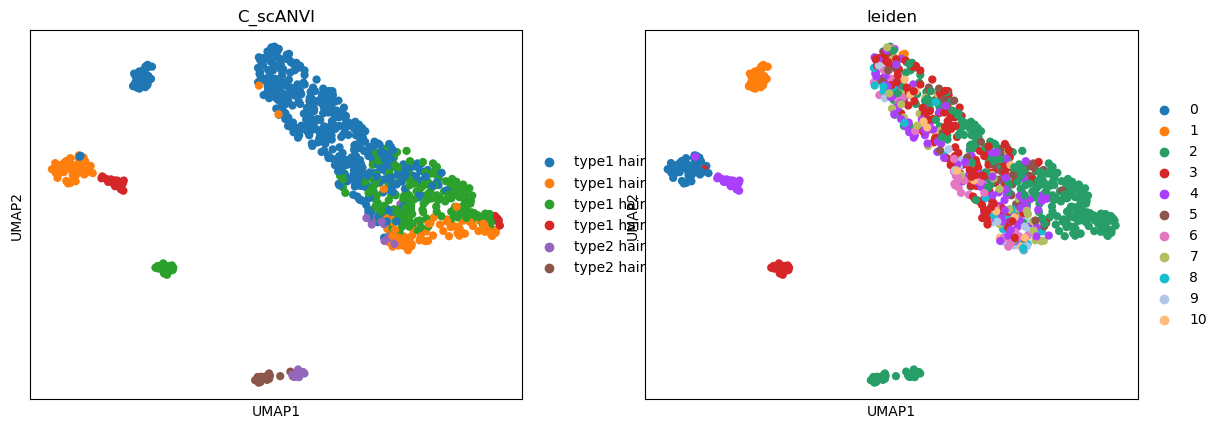

In [18]:
sc.tl.umap(adata, min_dist=0.5)
sc.pl.umap(adata,color=['C_scANVI','leiden'])

In [21]:
!mamba install -c conda-forge leidenalg
sc.tl.leiden(adata,resolution=0.5)

[Executed on 2023-12-12 17:10:06.620353]

Looking for: ['leidenalg']

warning  libmamba Cache file "/proj/sensoryaging/.conda/pkgs/cache/497deca9.json" was modified by another program
warning  libmamba Cache file "/proj/sensoryaging/.conda/pkgs/cache/09cdf8bf.json" was modified by another program
[+] 0.0s
file:///sw/apps/conda/latest/rackham/local_repo/.. Checked  0.0s
[+] 0.0s
file:///sw/apps/conda/latest/rackham/local_repo/.. Checked  0.0s
[+] 0.0s
file:///sw/apps/conda/latest/rackham/local_repo/.. Checked  0.0s
[+] 0.0s
file:///sw/apps/conda/latest/rackham/local_repo/.. Checked  0.0s
[+] 0.0s
file:///sw/apps/conda/latest/rackham/local_repo/.. Checked  0.0s
[+] 0.0s
file:///sw/apps/conda/latest/rackham/local_repo/.. Checked  0.0s
[+] 0.0s
file:///sw/apps/conda/latest/rackham/local_repo/.. Checked  0.0s
[+] 0.0s
file:///sw/apps/conda/latest/rackham/local_repo/.. Checked  0.0s
[+] 0.0s
file:///sw/apps/conda/latest/rackham/local_repo/.. Checked  0.0s
[+] 0.0s
file:///sw/apps/conda/lates

ImportError: Please install the leiden algorithm: `conda install -c conda-forge leidenalg` or `pip3 install leidenalg`.

[Executed on 2023-12-12 17:09:35.504273]


/proj/sensoryaging/.conda/env/scvi-envir/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/scvi-envir/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/scvi-envir/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Cat

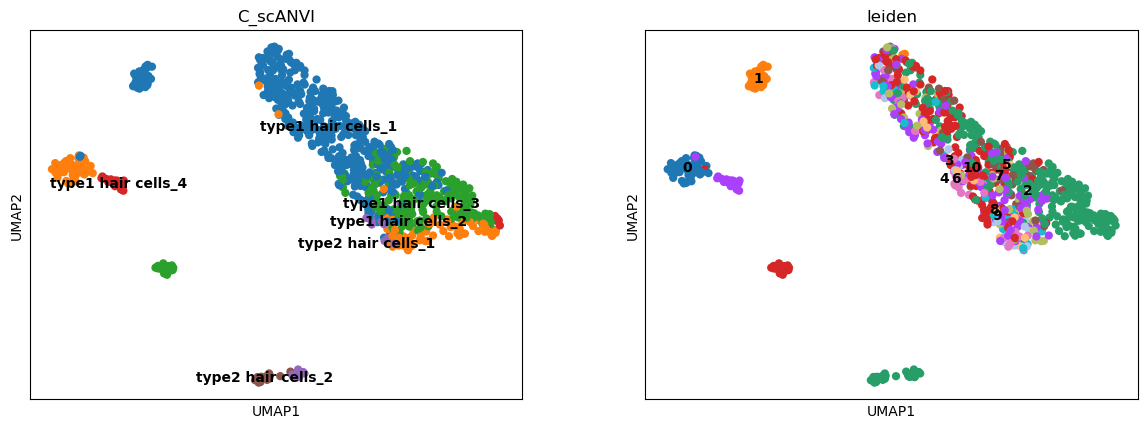

In [19]:
sc.pl.umap(adata,color=['C_scANVI','leiden'],legend_loc='on data')

In [10]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)


[Executed on 2023-12-12 16:04:10.305945]


In [ ]:
sc.pp.neighbors(adata, n_neighbors=15,use_rep='X_scANVI')



[Executed on 2023-12-12 16:09:00.253655]


/proj/sensoryaging/.conda/env/scvi-envir/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/scvi-envir/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


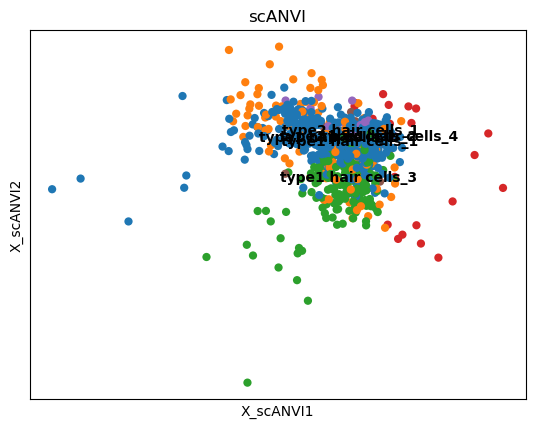

In [14]:
sc.pl.embedding(adata,basis='X_scANVI',color='C_scANVI',legend_loc='on data',title='scANVI')

In [22]:
adata.write_h5ad('/proj/sensoryaging/60_plates_data/Human_data/MLrealdata.h5ad')

[Executed on 2023-12-12 17:15:00.459050]
